## NES-LTER: Comparison between Sosik and Rynearson size-fractionated chlorophyll estimates

This notebook combines chlorophyll concentration estimates across two NES-LTER labs.

Read cleaned data from GitHub

In [1]:
import pandas as pd

BASE_URL = 'https://raw.githubusercontent.com/WHOIGit/nes-lter-examples/master/data/'

sosik_chl = pd.read_csv(BASE_URL + 'neslter_sosik_chl.csv')
ryn_chl = pd.read_csv(BASE_URL + 'neslter_rynearson_chl.csv')

Samples are replicated, so the chlorophyll concentration needs to be averaged across those replicates, per mesh size

In [2]:
def average_replicates(chl, replicates=['a','b'], var='chl'):
    rows = []
    # group by cruise, cast, niskin, and filter mesh size
    for ccnf, sdf in chl.groupby(['cruise','cast','niskin','filter_mesh_size']):
        # remove all rows except the replicates we want
        sdf_reps = sdf[sdf['replicate'].isin(replicates)]
        # average the variable
        var_average = sdf_reps[var].mean()
        # construct the output row
        row = ccnf + (var_average,)
        rows.append(row)
    return pd.DataFrame(rows, columns=['cruise','cast','niskin','filter_mesh_size',var])

def with_mesh_size(df, mesh_size):
    df = df[df['filter_mesh_size'] == mesh_size]
    return df

def avg_reps(df, mesh_size):
    return average_replicates(with_mesh_size(df, mesh_size)).dropna()

ryn_chl_gt20 = avg_reps(ryn_chl, '>20')
ryn_chl_gt5 = avg_reps(ryn_chl, '>5')
sosik_chl_gt20 = avg_reps(sosik_chl, '>20')
sosik_chl_gt5 = avg_reps(sosik_chl, '>5')
sosik_chl_gt5

,cruise,cast,niskin,filter_mesh_size,chl
0,EN608,4,12,>5,3.234257
1,EN608,12,8,>5,1.328368
2,EN608,12,11,>5,1.844982


Now merge the Sosik and Rynearson data on cruise/cast/niskin to find comparable values

In [3]:
def merge_chl(ryn, sosik):
    df = ryn.merge(sosik, on=['cruise','cast','niskin'])
    df = df.rename(columns={
        'chl_x': 'Rynearson',
        'chl_y': 'Sosik'
    })
    df = df.set_index(['cast','niskin'])
    return df[['Rynearson','Sosik']]

gt5 = merge_chl(ryn_chl_gt5, sosik_chl_gt5)
gt20 = merge_chl(ryn_chl_gt20, sosik_chl_gt20)
gt5

Rynearson     Sosik
cast niskin                     
4    12       3.599091  3.234257
12   8        1.499998  1.328368
     11       1.792755  1.844982

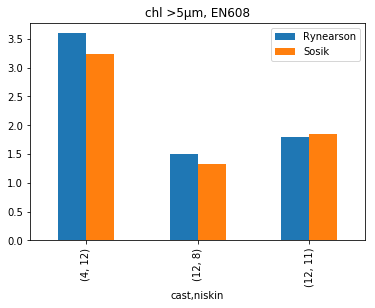

In [4]:
%matplotlib inline
gt5.plot.bar(title='chl >5µm, EN608');

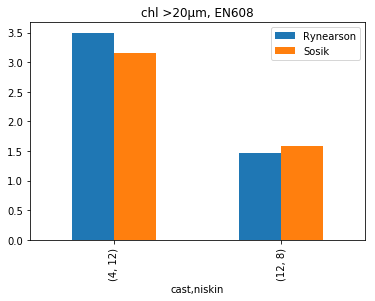

In [5]:
gt20.plot.bar(title='chl >20µm, EN608');